Question 1 : PyTorch Implementation with MCE

In [10]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
def load_and_preprocess_datasets():
    datasets = {}
    dataset_names = ['center_surround', 'spiral', 'two_gaussians', 'xor']
    
    for name in dataset_names:
        train_data = pd.read_csv(f'{name}_train.csv')
        val_data = pd.read_csv(f'{name}_valid.csv')
        test_data = pd.read_csv(f'{name}_test.csv')
        
        X_train = train_data[['x1', 'x2']].values
        y_train = train_data['label'].values
        X_val = val_data[['x1', 'x2']].values
        y_val = val_data['label'].values
        X_test = test_data[['x1', 'x2']].values
        y_test = test_data['label'].values
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train = torch.FloatTensor(X_train)
        y_train = torch.LongTensor(y_train)
        X_val = torch.FloatTensor(X_val)
        y_val = torch.LongTensor(y_val)
        X_test = torch.FloatTensor(X_test)
        y_test = torch.LongTensor(y_test)
        
        datasets[name] = {
            'train': (X_train, y_train),
            'valid': (X_val, y_val),
            'test': (X_test, y_test)
        }
    
    return datasets

In [3]:
#Pytorch implementation with MCE
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.Tanh()
        self.layer2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

In [4]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=300, patience=30):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

In [5]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

In [6]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    model.eval()
    with torch.no_grad():
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = torch.argmax(Z, dim=1).reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


Processing center_surround dataset
Epoch 0: Train Loss: 0.7243, Val Loss: 0.7442
Epoch 10: Train Loss: 0.6890, Val Loss: 0.6898
Epoch 20: Train Loss: 0.6615, Val Loss: 0.6382
Epoch 30: Train Loss: 0.6355, Val Loss: 0.6028
Epoch 40: Train Loss: 0.6180, Val Loss: 0.5826
Epoch 50: Train Loss: 0.5875, Val Loss: 0.5635
Epoch 60: Train Loss: 0.5731, Val Loss: 0.5307
Epoch 70: Train Loss: 0.5533, Val Loss: 0.5141
Epoch 80: Train Loss: 0.5268, Val Loss: 0.4856
Epoch 90: Train Loss: 0.5233, Val Loss: 0.4561
Epoch 100: Train Loss: 0.5025, Val Loss: 0.4556
Epoch 110: Train Loss: 0.4967, Val Loss: 0.4464
Epoch 120: Train Loss: 0.4960, Val Loss: 0.4447
Epoch 130: Train Loss: 0.4816, Val Loss: 0.4432
Epoch 140: Train Loss: 0.4972, Val Loss: 0.4361
Epoch 150: Train Loss: 0.5125, Val Loss: 0.4333
Epoch 160: Train Loss: 0.5251, Val Loss: 0.4383
Epoch 170: Train Loss: 0.5185, Val Loss: 0.4234
Epoch 180: Train Loss: 0.5227, Val Loss: 0.4284
Epoch 190: Train Loss: 0.4816, Val Loss: 0.4277
Early stopping 

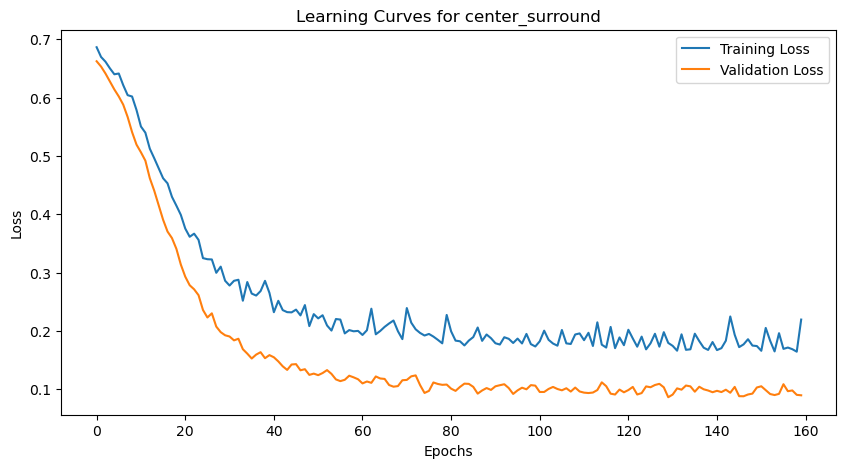

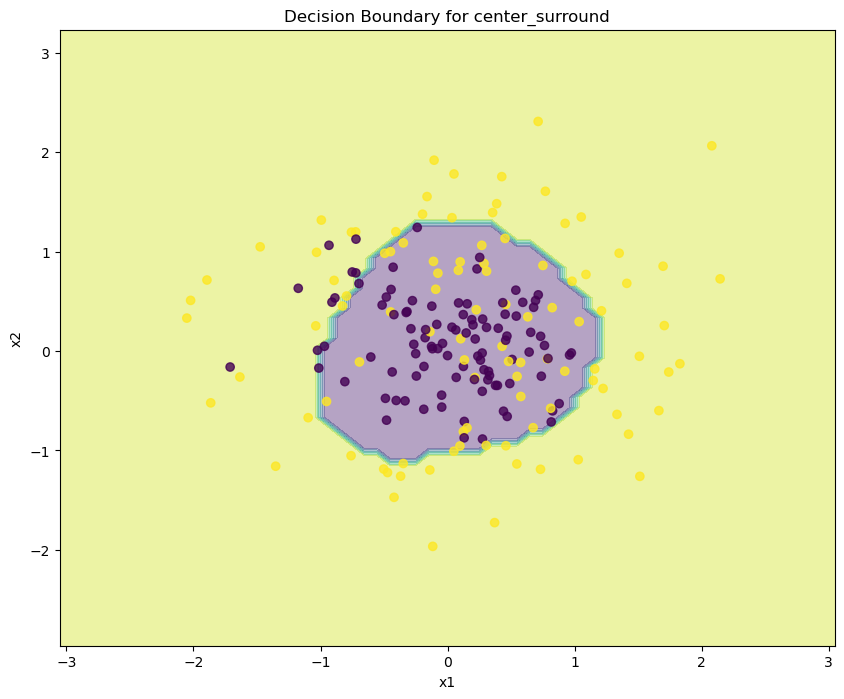


Processing spiral dataset
Epoch 0: Train Loss: 0.8938, Val Loss: 0.8272
Epoch 10: Train Loss: 0.6769, Val Loss: 0.6762
Epoch 20: Train Loss: 0.5160, Val Loss: 0.5479
Epoch 30: Train Loss: 0.4803, Val Loss: 0.5043
Epoch 40: Train Loss: 0.4707, Val Loss: 0.4968
Epoch 50: Train Loss: 0.4755, Val Loss: 0.4935
Epoch 60: Train Loss: 0.4624, Val Loss: 0.4943
Epoch 70: Train Loss: 0.4350, Val Loss: 0.4924
Epoch 80: Train Loss: 0.4511, Val Loss: 0.4886
Epoch 90: Train Loss: 0.4417, Val Loss: 0.4834
Epoch 100: Train Loss: 0.4563, Val Loss: 0.4798
Epoch 110: Train Loss: 0.4436, Val Loss: 0.4755
Epoch 120: Train Loss: 0.4520, Val Loss: 0.4737
Epoch 130: Train Loss: 0.4289, Val Loss: 0.4708
Epoch 140: Train Loss: 0.4052, Val Loss: 0.4642
Epoch 150: Train Loss: 0.4189, Val Loss: 0.4634
Epoch 160: Train Loss: 0.4368, Val Loss: 0.4591
Epoch 170: Train Loss: 0.4330, Val Loss: 0.4560
Epoch 180: Train Loss: 0.4212, Val Loss: 0.4544
Epoch 190: Train Loss: 0.3878, Val Loss: 0.4534
Epoch 200: Train Loss: 0

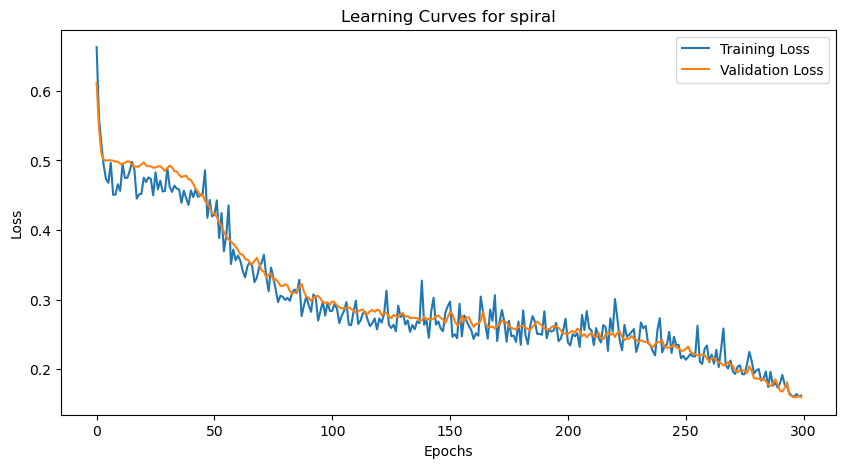

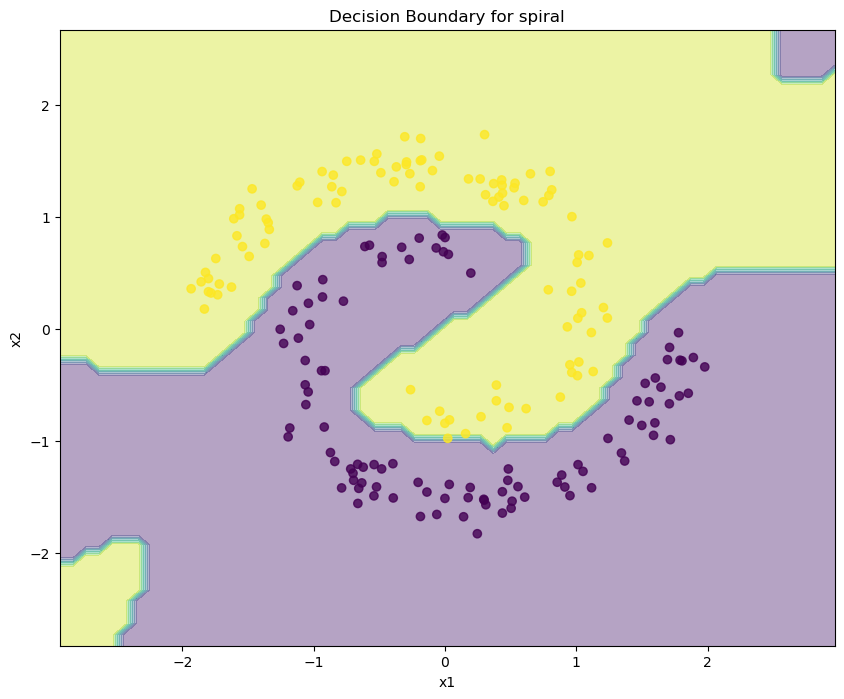


Processing two_gaussians dataset
Epoch 0: Train Loss: 1.0008, Val Loss: 0.9763
Epoch 10: Train Loss: 0.3880, Val Loss: 0.3312
Epoch 20: Train Loss: 0.1924, Val Loss: 0.1082
Epoch 30: Train Loss: 0.1432, Val Loss: 0.0817
Epoch 40: Train Loss: 0.1472, Val Loss: 0.0735
Epoch 50: Train Loss: 0.1129, Val Loss: 0.0733
Epoch 60: Train Loss: 0.1132, Val Loss: 0.0713
Epoch 70: Train Loss: 0.1228, Val Loss: 0.0763
Epoch 80: Train Loss: 0.1154, Val Loss: 0.0738
Early stopping at epoch 90
Epoch 0: Train Loss: 0.5943, Val Loss: 0.5444
Epoch 10: Train Loss: 0.1530, Val Loss: 0.1075
Epoch 20: Train Loss: 0.1170, Val Loss: 0.0792
Epoch 30: Train Loss: 0.1146, Val Loss: 0.0735
Epoch 40: Train Loss: 0.1605, Val Loss: 0.0728
Epoch 50: Train Loss: 0.1119, Val Loss: 0.0746
Epoch 60: Train Loss: 0.1106, Val Loss: 0.0735
Epoch 70: Train Loss: 0.1132, Val Loss: 0.0745
Early stopping at epoch 71
Epoch 0: Train Loss: 0.6183, Val Loss: 0.5108
Epoch 10: Train Loss: 0.1302, Val Loss: 0.0866
Epoch 20: Train Loss: 

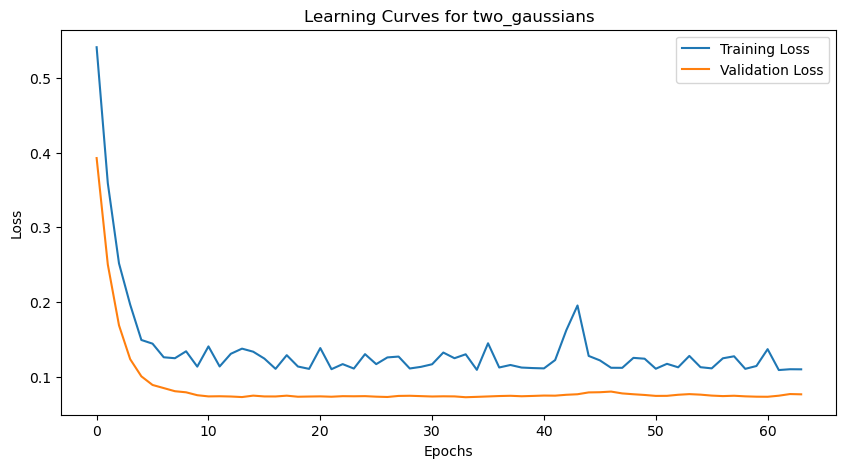

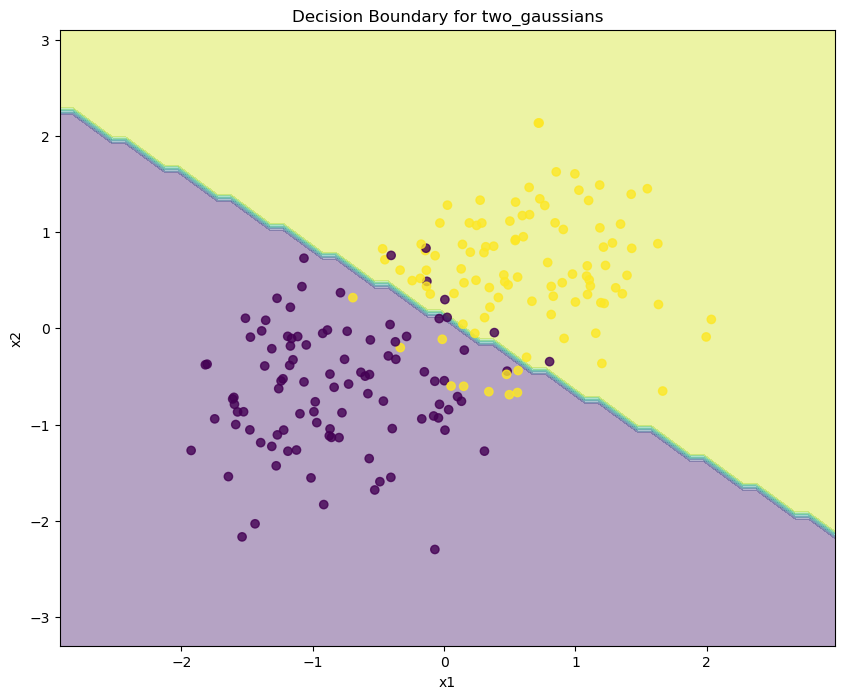


Processing xor dataset
Epoch 0: Train Loss: 0.7220, Val Loss: 0.7536
Epoch 10: Train Loss: 0.6722, Val Loss: 0.7018
Epoch 20: Train Loss: 0.6425, Val Loss: 0.6749
Epoch 30: Train Loss: 0.6211, Val Loss: 0.6468
Epoch 40: Train Loss: 0.5487, Val Loss: 0.5940
Epoch 50: Train Loss: 0.5444, Val Loss: 0.5433
Epoch 60: Train Loss: 0.5220, Val Loss: 0.5379
Epoch 70: Train Loss: 0.5222, Val Loss: 0.5372
Epoch 80: Train Loss: 0.5359, Val Loss: 0.5414
Epoch 90: Train Loss: 0.5106, Val Loss: 0.5415
Epoch 100: Train Loss: 0.5271, Val Loss: 0.5386
Epoch 110: Train Loss: 0.4764, Val Loss: 0.5277
Epoch 120: Train Loss: 0.5609, Val Loss: 0.5386
Epoch 130: Train Loss: 0.5118, Val Loss: 0.5200
Early stopping at epoch 132
Epoch 0: Train Loss: 0.6773, Val Loss: 0.7138
Epoch 10: Train Loss: 0.6760, Val Loss: 0.6985
Epoch 20: Train Loss: 0.6418, Val Loss: 0.6689
Epoch 30: Train Loss: 0.5555, Val Loss: 0.5896
Epoch 40: Train Loss: 0.5081, Val Loss: 0.5463
Epoch 50: Train Loss: 0.4562, Val Loss: 0.5283
Epoch 

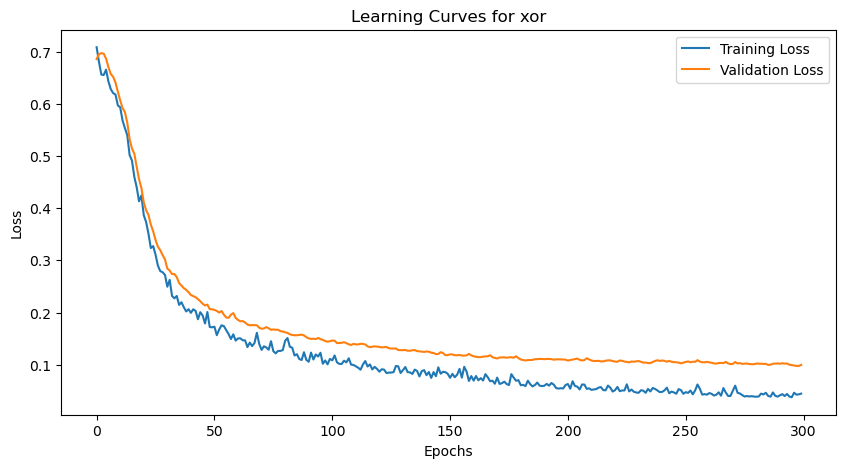

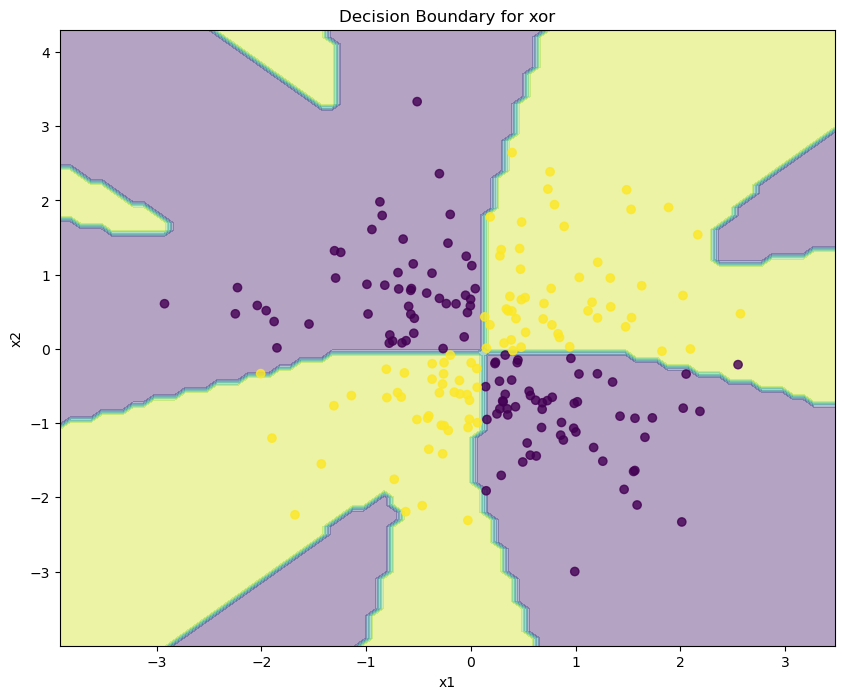

In [7]:
#Question 1 implementation
datasets = load_and_preprocess_datasets()
hidden_nodes = [2, 3, 5, 7, 9]
input_dim = 2
output_dim = 2
batch_size = 32
num_epochs = 300
learning_rate = 0.01

for dataset_name, data in datasets.items():
    print(f"\nProcessing {dataset_name} dataset")
    
    X_train, y_train = data['train']
    X_val, y_val = data['valid']
    X_test, y_test = data['test']
    
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_dataset = TensorDataset(X_test, y_test)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    best_model = None
    best_accuracy = 0
    best_k = 0
    
    for k in hidden_nodes:
        model = FFNN(input_dim=input_dim, hidden_dim=k, output_dim=output_dim)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience=30)
        
        accuracy = evaluate_model(model, test_loader)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_k = k
    
    print(f"Best number of hidden nodes: {best_k}")
    print(f"Best test accuracy: {best_accuracy:.4f}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Learning Curves for {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    plot_decision_boundary(best_model, X_test.numpy(), y_test.numpy(), f"Decision Boundary for {dataset_name}")

# Code Implementation for question 2

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
def load_and_preprocess_datasets():
    datasets = {}
    dataset_names = ['center_surround', 'spiral', 'two_gaussians', 'xor']
    
    for name in dataset_names:
        train_data = pd.read_csv(f'{name}_train.csv')
        val_data = pd.read_csv(f'{name}_valid.csv')
        test_data = pd.read_csv(f'{name}_test.csv')
        
        X_train = train_data[['x1', 'x2']].values
        y_train = train_data['label'].values
        X_val = val_data[['x1', 'x2']].values
        y_val = val_data['label'].values
        X_test = test_data[['x1', 'x2']].values
        y_test = test_data['label'].values
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train = torch.FloatTensor(X_train)
        y_train = torch.FloatTensor(y_train).unsqueeze(1)
        X_val = torch.FloatTensor(X_val)
        y_val = torch.FloatTensor(y_val).unsqueeze(1)
        X_test = torch.FloatTensor(X_test)
        y_test = torch.FloatTensor(y_test).unsqueeze(1)
        
        datasets[name] = {
            'train': (X_train, y_train),
            'valid': (X_val, y_val),
            'test': (X_test, y_test)
        }
    
    return datasets

In [23]:
class FFNNWithMSE(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FFNNWithMSE, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.Tanh()
        self.layer2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

In [24]:
def train_model(model, train_data, val_data, criterion, optimizer, num_epochs=300, patience=30):
    X_train, y_train = train_data
    X_val, y_val = val_data
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    
    return train_losses, val_losses

In [25]:
def evaluate_model(model, test_data):
    X_test, y_test = test_data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_test).float().mean().item()
    return accuracy

In [26]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    model.eval()
    with torch.no_grad():
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = (Z > 0.5).float().reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


Processing center_surround dataset
Epoch 0: Train Loss: 0.2740, Val Loss: 0.2741
Epoch 10: Train Loss: 0.2618, Val Loss: 0.2624
Epoch 20: Train Loss: 0.2500, Val Loss: 0.2503
Epoch 30: Train Loss: 0.2394, Val Loss: 0.2372
Epoch 40: Train Loss: 0.2298, Val Loss: 0.2243
Epoch 50: Train Loss: 0.2200, Val Loss: 0.2110
Epoch 60: Train Loss: 0.2096, Val Loss: 0.1973
Epoch 70: Train Loss: 0.1992, Val Loss: 0.1836
Epoch 80: Train Loss: 0.1895, Val Loss: 0.1716
Epoch 90: Train Loss: 0.1808, Val Loss: 0.1616
Epoch 100: Train Loss: 0.1731, Val Loss: 0.1536
Epoch 110: Train Loss: 0.1664, Val Loss: 0.1471
Epoch 120: Train Loss: 0.1608, Val Loss: 0.1417
Epoch 130: Train Loss: 0.1562, Val Loss: 0.1374
Epoch 140: Train Loss: 0.1526, Val Loss: 0.1338
Epoch 150: Train Loss: 0.1498, Val Loss: 0.1308
Epoch 160: Train Loss: 0.1476, Val Loss: 0.1283
Epoch 170: Train Loss: 0.1458, Val Loss: 0.1262
Epoch 180: Train Loss: 0.1444, Val Loss: 0.1244
Epoch 190: Train Loss: 0.1433, Val Loss: 0.1228
Epoch 200: Trai

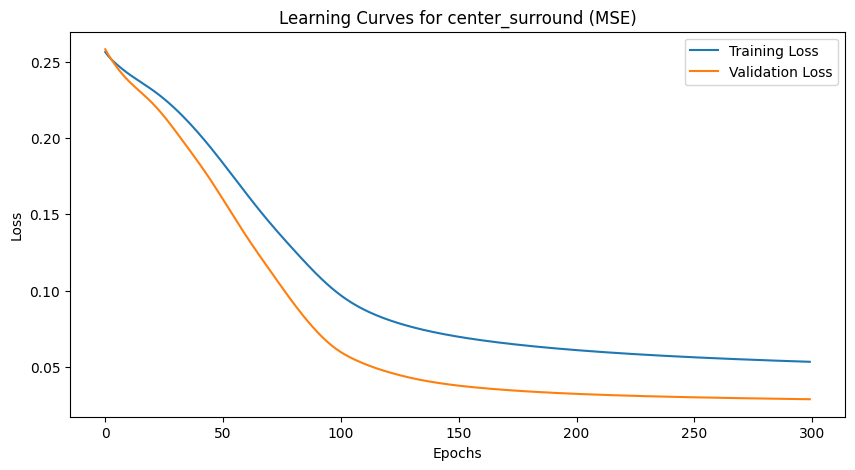

/var/folders/60/m4vjsxs154b8jqhld_x5c2j80000gn/T/ipykernel_19790/3029808130.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
/var/folders/60/m4vjsxs154b8jqhld_x5c2j80000gn/T/ipykernel_19790/3029808130.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, 0.1))


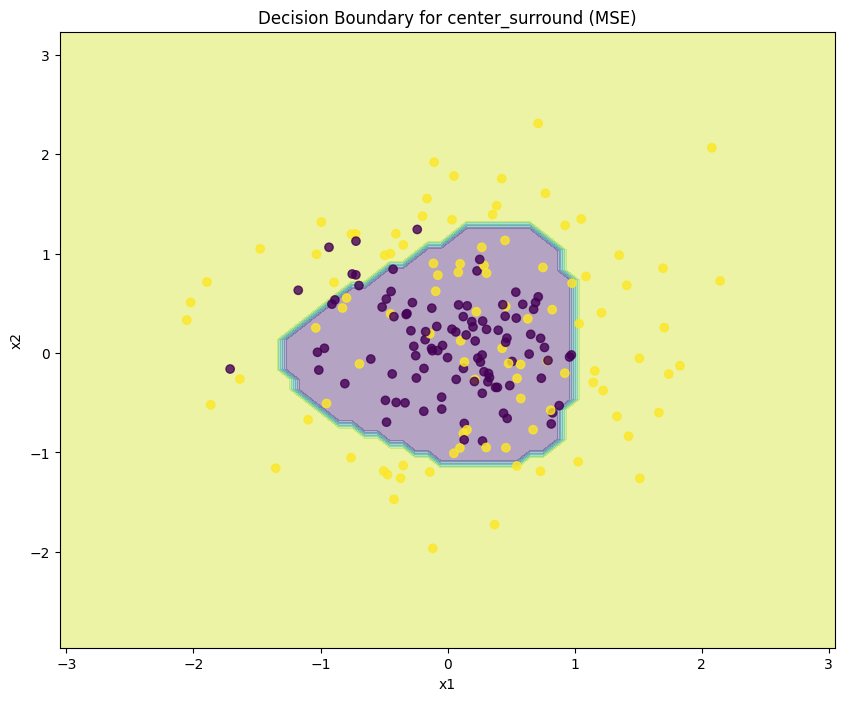


Processing spiral dataset
Epoch 0: Train Loss: 0.3205, Val Loss: 0.3194
Epoch 10: Train Loss: 0.2915, Val Loss: 0.2924
Epoch 20: Train Loss: 0.2708, Val Loss: 0.2723
Epoch 30: Train Loss: 0.2585, Val Loss: 0.2597
Epoch 40: Train Loss: 0.2525, Val Loss: 0.2529
Epoch 50: Train Loss: 0.2499, Val Loss: 0.2494
Epoch 60: Train Loss: 0.2482, Val Loss: 0.2469
Epoch 70: Train Loss: 0.2460, Val Loss: 0.2441
Epoch 80: Train Loss: 0.2418, Val Loss: 0.2396
Epoch 90: Train Loss: 0.2338, Val Loss: 0.2320
Epoch 100: Train Loss: 0.2206, Val Loss: 0.2204
Epoch 110: Train Loss: 0.2052, Val Loss: 0.2080
Epoch 120: Train Loss: 0.1931, Val Loss: 0.1990
Epoch 130: Train Loss: 0.1847, Val Loss: 0.1927
Epoch 140: Train Loss: 0.1786, Val Loss: 0.1874
Epoch 150: Train Loss: 0.1743, Val Loss: 0.1836
Epoch 160: Train Loss: 0.1714, Val Loss: 0.1813
Epoch 170: Train Loss: 0.1694, Val Loss: 0.1799
Epoch 180: Train Loss: 0.1679, Val Loss: 0.1789
Epoch 190: Train Loss: 0.1667, Val Loss: 0.1781
Epoch 200: Train Loss: 0

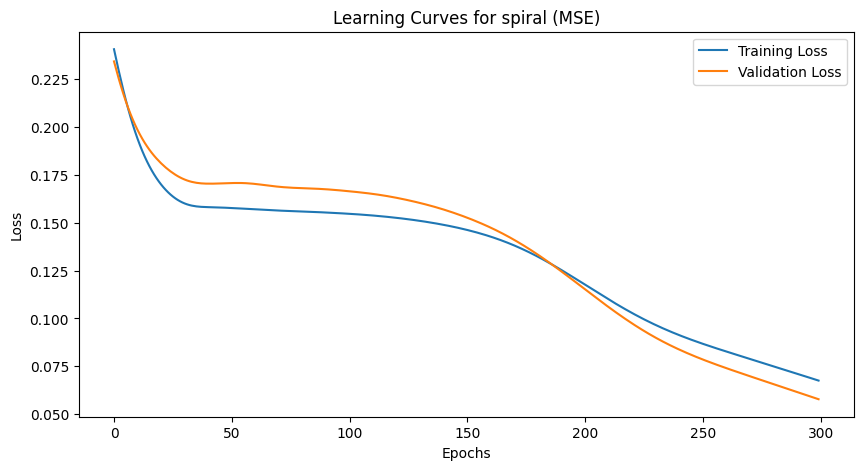

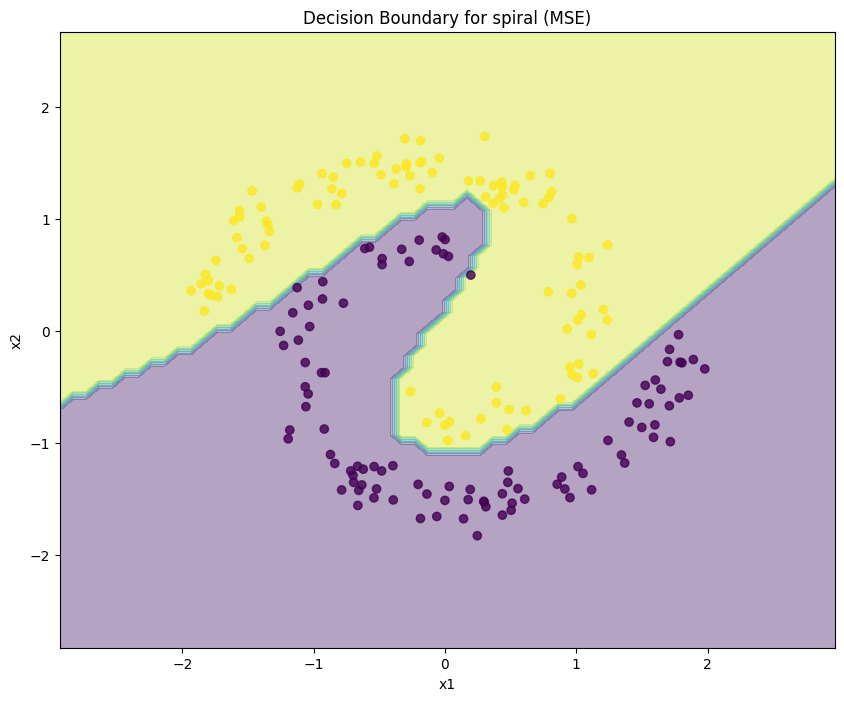


Processing two_gaussians dataset
Epoch 0: Train Loss: 0.2678, Val Loss: 0.2638
Epoch 10: Train Loss: 0.2408, Val Loss: 0.2355
Epoch 20: Train Loss: 0.2158, Val Loss: 0.2075
Epoch 30: Train Loss: 0.1808, Val Loss: 0.1685
Epoch 40: Train Loss: 0.1434, Val Loss: 0.1291
Epoch 50: Train Loss: 0.1116, Val Loss: 0.0978
Epoch 60: Train Loss: 0.0887, Val Loss: 0.0747
Epoch 70: Train Loss: 0.0734, Val Loss: 0.0600
Epoch 80: Train Loss: 0.0634, Val Loss: 0.0501
Epoch 90: Train Loss: 0.0568, Val Loss: 0.0435
Epoch 100: Train Loss: 0.0523, Val Loss: 0.0389
Epoch 110: Train Loss: 0.0490, Val Loss: 0.0355
Epoch 120: Train Loss: 0.0466, Val Loss: 0.0331
Epoch 130: Train Loss: 0.0448, Val Loss: 0.0311
Epoch 140: Train Loss: 0.0434, Val Loss: 0.0296
Epoch 150: Train Loss: 0.0423, Val Loss: 0.0284
Epoch 160: Train Loss: 0.0414, Val Loss: 0.0274
Epoch 170: Train Loss: 0.0406, Val Loss: 0.0266
Epoch 180: Train Loss: 0.0400, Val Loss: 0.0259
Epoch 190: Train Loss: 0.0395, Val Loss: 0.0253
Epoch 200: Train 

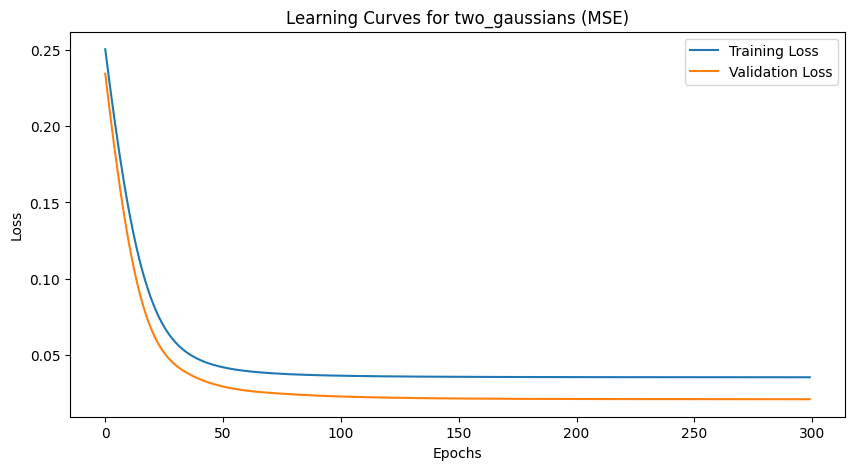

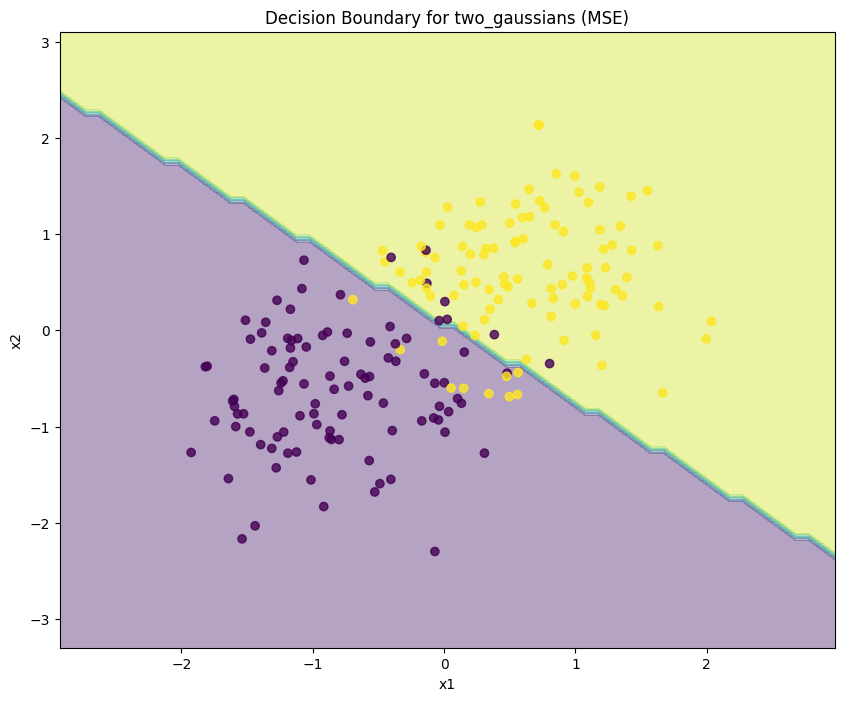


Processing xor dataset
Epoch 0: Train Loss: 0.2391, Val Loss: 0.2537
Epoch 10: Train Loss: 0.2352, Val Loss: 0.2571
Epoch 20: Train Loss: 0.2317, Val Loss: 0.2537
Epoch 30: Train Loss: 0.2278, Val Loss: 0.2503
Epoch 40: Train Loss: 0.2225, Val Loss: 0.2455
Epoch 50: Train Loss: 0.2152, Val Loss: 0.2383
Epoch 60: Train Loss: 0.2061, Val Loss: 0.2286
Epoch 70: Train Loss: 0.1968, Val Loss: 0.2179
Epoch 80: Train Loss: 0.1885, Val Loss: 0.2084
Epoch 90: Train Loss: 0.1820, Val Loss: 0.2010
Epoch 100: Train Loss: 0.1771, Val Loss: 0.1958
Epoch 110: Train Loss: 0.1736, Val Loss: 0.1922
Epoch 120: Train Loss: 0.1712, Val Loss: 0.1898
Epoch 130: Train Loss: 0.1696, Val Loss: 0.1883
Epoch 140: Train Loss: 0.1684, Val Loss: 0.1874
Epoch 150: Train Loss: 0.1677, Val Loss: 0.1867
Epoch 160: Train Loss: 0.1671, Val Loss: 0.1864
Epoch 170: Train Loss: 0.1668, Val Loss: 0.1861
Epoch 180: Train Loss: 0.1665, Val Loss: 0.1860
Epoch 190: Train Loss: 0.1663, Val Loss: 0.1860
Epoch 200: Train Loss: 0.16

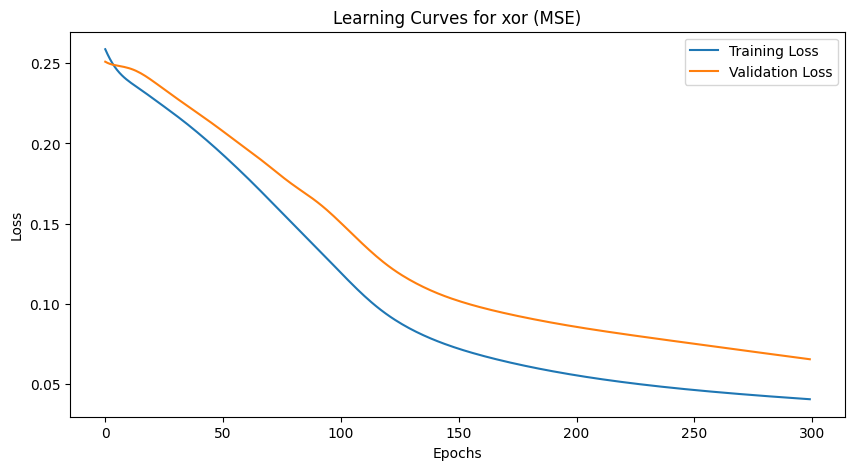

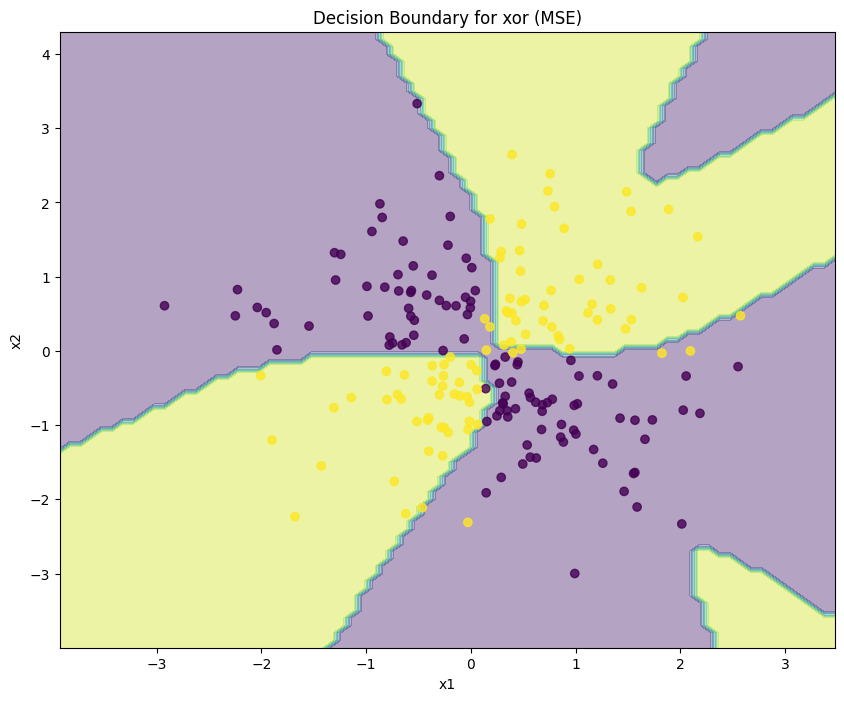

In [27]:
datasets = load_and_preprocess_datasets()
hidden_nodes = [2, 3, 5, 7, 9]
input_dim = 2
learning_rate = 0.01

for dataset_name, data in datasets.items():
    print(f"\nProcessing {dataset_name} dataset")
    
    train_data = data['train']
    val_data = data['valid']
    test_data = data['test']
    
    best_model = None
    best_accuracy = 0
    best_k = 0
    
    for k in hidden_nodes:
        model = FFNNWithMSE(input_dim=input_dim, hidden_dim=k)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        train_losses, val_losses = train_model(model, train_data, val_data, criterion, optimizer)
        
        accuracy = evaluate_model(model, test_data)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_k = k
    
    print(f"Best number of hidden nodes: {best_k}")
    print(f"Best test accuracy: {best_accuracy:.4f}")
    
    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Learning Curves for {dataset_name} (MSE)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Plot decision boundary
    X_test, y_test = test_data
    plot_decision_boundary(best_model, X_test, y_test, f"Decision Boundary for {dataset_name} (MSE)")

Question 3: Calculating Gradients by hand in the backward method

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
def load_and_preprocess_datasets():
    datasets = {}
    dataset_names = ['center_surround', 'spiral', 'two_gaussians', 'xor']
    
    for name in dataset_names:
        train_data = pd.read_csv(f'{name}_train.csv')
        val_data = pd.read_csv(f'{name}_valid.csv')
        test_data = pd.read_csv(f'{name}_test.csv')
        
        X_train = train_data[['x1', 'x2']].values
        y_train = train_data['label'].values
        X_val = val_data[['x1', 'x2']].values
        y_val = val_data['label'].values
        X_test = test_data[['x1', 'x2']].values
        y_test = test_data['label'].values
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        datasets[name] = {
            'train': (X_train, y_train),
            'valid': (X_val, y_val),
            'test': (X_test, y_test)
        }
    
    return datasets

In [12]:
class ManualNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights with Xavier initialization
        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2.0 / input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2.0 / hidden_dim)
        self.b2 = np.zeros((1, output_dim))
    
    def tanh(self, x):
        pos_exp = np.exp(x)
        neg_exp = np.exp(-x)
        return (pos_exp - neg_exp) / (pos_exp + neg_exp)
    
    def tanh_derivative(self, x):
        return 1.0 - np.square(self.tanh(x))
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1.0 - s)
    
    def forward(self, X):
        # Initialize arrays for activations
        m = X.shape[0] 
        self.z1 = np.zeros((m, self.W1.shape[1]))
        self.a1 = np.zeros((m, self.W1.shape[1]))
        self.z2 = np.zeros((m, self.W2.shape[1]))
        self.a2 = np.zeros((m, self.W2.shape[1]))
        
        for i in range(m):
            # First layer
            for j in range(self.W1.shape[1]):
                # Manual dot product for input layer
                self.z1[i, j] = self.b1[0, j]
                for k in range(X.shape[1]):
                    self.z1[i, j] += X[i, k] * self.W1[k, j]
                self.a1[i, j] = self.tanh(self.z1[i, j])
            
            # Second layer
            for j in range(self.W2.shape[1]):
                # Manual dot product for output layer
                self.z2[i, j] = self.b2[0, j]
                for k in range(self.W2.shape[0]):
                    self.z2[i, j] += self.a1[i, k] * self.W2[k, j]
                self.a2[i, j] = self.sigmoid(self.z2[i, j])
        
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Initialize gradient matrices
        dW1 = np.zeros_like(self.W1)
        db1 = np.zeros_like(self.b1)
        dW2 = np.zeros_like(self.W2)
        db2 = np.zeros_like(self.b2)
        
        for i in range(m):
            # Output layer gradients
            dz2_i = self.a2[i] - y[i]  # dL/da2 * da2/dz2
            
            # Hidden layer gradients
            da1_i = np.zeros(self.W1.shape[1])
            for j in range(self.W2.shape[1]):
                for k in range(self.W2.shape[0]):
                    da1_i[k] += dz2_i[j] * self.W2[k, j]
            
            dz1_i = da1_i * self.tanh_derivative(self.z1[i])
            
            # Weight gradients using explicit loops
            for j in range(self.W1.shape[1]):
                for k in range(self.W1.shape[0]):
                    dW1[k, j] += X[i, k] * dz1_i[j]
                db1[0, j] += dz1_i[j]
                
            for j in range(self.W2.shape[1]):
                for k in range(self.W2.shape[0]):
                    dW2[k, j] += self.a1[i, k] * dz2_i[j]
                db2[0, j] += dz2_i[j]
        
        # Update weights and biases
        self.W2 -= learning_rate * dW2 / m
        self.b2 -= learning_rate * db2 / m
        self.W1 -= learning_rate * dW1 / m
        self.b1 -= learning_rate * db1 / m


In [13]:
def train_manual_model(model, X_train, y_train, X_val, y_val, learning_rate, num_epochs=300, patience=30):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    # Reshape targets
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model.forward(X_train)
        
        # Compute MSE loss
        train_loss = np.mean(np.square(y_pred - y_train))
        train_losses.append(train_loss)
        
        # Backward pass
        model.backward(X_train, y_train, learning_rate)
        
        # Validation
        y_val_pred = model.forward(X_val)
        val_loss = np.mean(np.square(y_val_pred - y_val))
        val_losses.append(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            
        if epochs_without_improvement >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            
    return train_losses, val_losses

In [14]:
def evaluate_manual_model(model, X, y):
    predictions = (model.forward(X) > 0.5).astype(int)
    return np.mean(predictions.reshape(-1) == y)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(mesh_points)
    Z = (Z > 0.5).reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


Processing center_surround dataset
Epoch 0: Train Loss: 0.2689, Val Loss: 0.2539
Epoch 10: Train Loss: 0.2677, Val Loss: 0.2530
Epoch 20: Train Loss: 0.2667, Val Loss: 0.2522
Epoch 30: Train Loss: 0.2656, Val Loss: 0.2514
Epoch 40: Train Loss: 0.2647, Val Loss: 0.2506
Epoch 50: Train Loss: 0.2637, Val Loss: 0.2499
Epoch 60: Train Loss: 0.2628, Val Loss: 0.2493
Epoch 70: Train Loss: 0.2620, Val Loss: 0.2487
Epoch 80: Train Loss: 0.2612, Val Loss: 0.2481
Epoch 90: Train Loss: 0.2605, Val Loss: 0.2476
Epoch 100: Train Loss: 0.2597, Val Loss: 0.2471
Epoch 110: Train Loss: 0.2591, Val Loss: 0.2466
Epoch 120: Train Loss: 0.2584, Val Loss: 0.2462
Epoch 130: Train Loss: 0.2578, Val Loss: 0.2458
Epoch 140: Train Loss: 0.2572, Val Loss: 0.2454
Epoch 150: Train Loss: 0.2567, Val Loss: 0.2451
Epoch 160: Train Loss: 0.2561, Val Loss: 0.2447
Epoch 170: Train Loss: 0.2557, Val Loss: 0.2444
Epoch 180: Train Loss: 0.2552, Val Loss: 0.2441
Epoch 190: Train Loss: 0.2547, Val Loss: 0.2439
Epoch 200: Trai

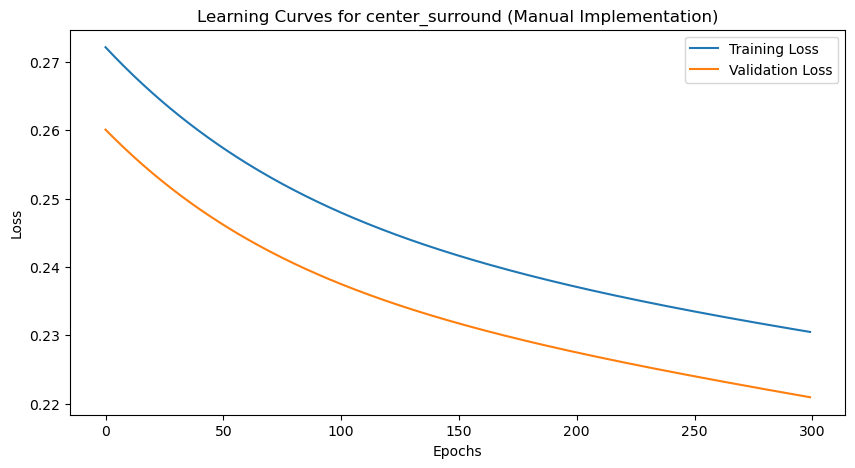

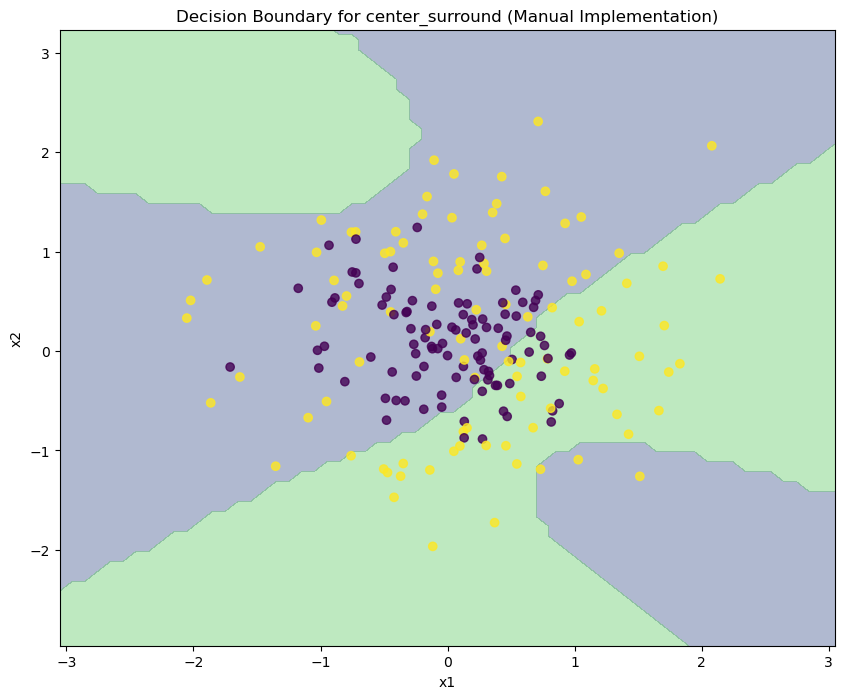


Processing spiral dataset
Epoch 0: Train Loss: 0.4433, Val Loss: 0.4027
Epoch 10: Train Loss: 0.4391, Val Loss: 0.3981
Epoch 20: Train Loss: 0.4348, Val Loss: 0.3936
Epoch 30: Train Loss: 0.4305, Val Loss: 0.3890
Epoch 40: Train Loss: 0.4261, Val Loss: 0.3844
Epoch 50: Train Loss: 0.4217, Val Loss: 0.3799
Epoch 60: Train Loss: 0.4172, Val Loss: 0.3754
Epoch 70: Train Loss: 0.4128, Val Loss: 0.3708
Epoch 80: Train Loss: 0.4082, Val Loss: 0.3663
Epoch 90: Train Loss: 0.4037, Val Loss: 0.3618
Epoch 100: Train Loss: 0.3991, Val Loss: 0.3573
Epoch 110: Train Loss: 0.3945, Val Loss: 0.3528
Epoch 120: Train Loss: 0.3898, Val Loss: 0.3483
Epoch 130: Train Loss: 0.3852, Val Loss: 0.3439
Epoch 140: Train Loss: 0.3805, Val Loss: 0.3395
Epoch 150: Train Loss: 0.3758, Val Loss: 0.3350
Epoch 160: Train Loss: 0.3710, Val Loss: 0.3307
Epoch 170: Train Loss: 0.3663, Val Loss: 0.3263
Epoch 180: Train Loss: 0.3616, Val Loss: 0.3220
Epoch 190: Train Loss: 0.3568, Val Loss: 0.3177
Epoch 200: Train Loss: 0

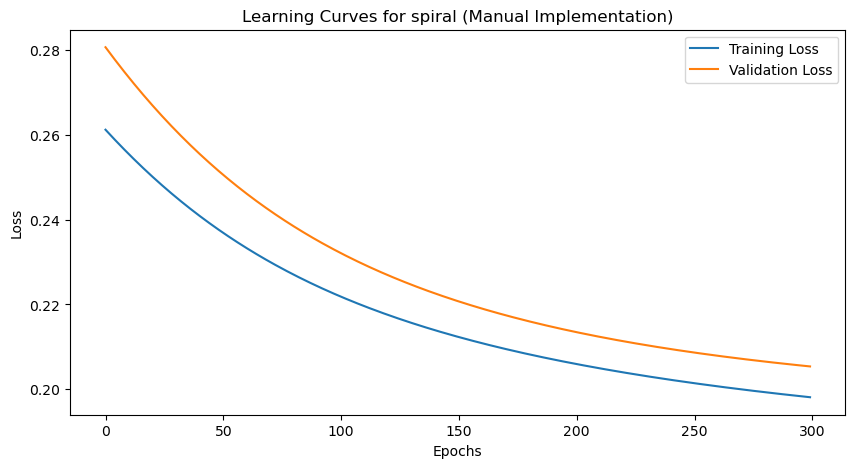

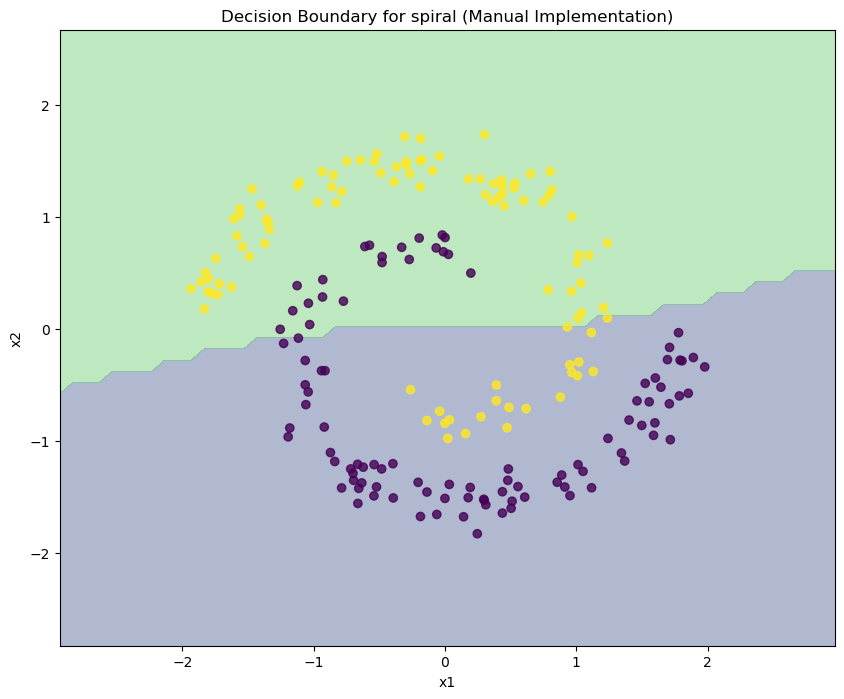


Processing two_gaussians dataset
Epoch 0: Train Loss: 0.4205, Val Loss: 0.4333
Epoch 10: Train Loss: 0.4089, Val Loss: 0.4208
Epoch 20: Train Loss: 0.3975, Val Loss: 0.4086
Epoch 30: Train Loss: 0.3865, Val Loss: 0.3967
Epoch 40: Train Loss: 0.3757, Val Loss: 0.3851
Epoch 50: Train Loss: 0.3653, Val Loss: 0.3738
Epoch 60: Train Loss: 0.3552, Val Loss: 0.3629
Epoch 70: Train Loss: 0.3453, Val Loss: 0.3523
Epoch 80: Train Loss: 0.3358, Val Loss: 0.3421
Epoch 90: Train Loss: 0.3266, Val Loss: 0.3322
Epoch 100: Train Loss: 0.3177, Val Loss: 0.3225
Epoch 110: Train Loss: 0.3091, Val Loss: 0.3133
Epoch 120: Train Loss: 0.3008, Val Loss: 0.3043
Epoch 130: Train Loss: 0.2928, Val Loss: 0.2956
Epoch 140: Train Loss: 0.2851, Val Loss: 0.2872
Epoch 150: Train Loss: 0.2777, Val Loss: 0.2792
Epoch 160: Train Loss: 0.2705, Val Loss: 0.2714
Epoch 170: Train Loss: 0.2636, Val Loss: 0.2638
Epoch 180: Train Loss: 0.2569, Val Loss: 0.2566
Epoch 190: Train Loss: 0.2505, Val Loss: 0.2496
Epoch 200: Train 

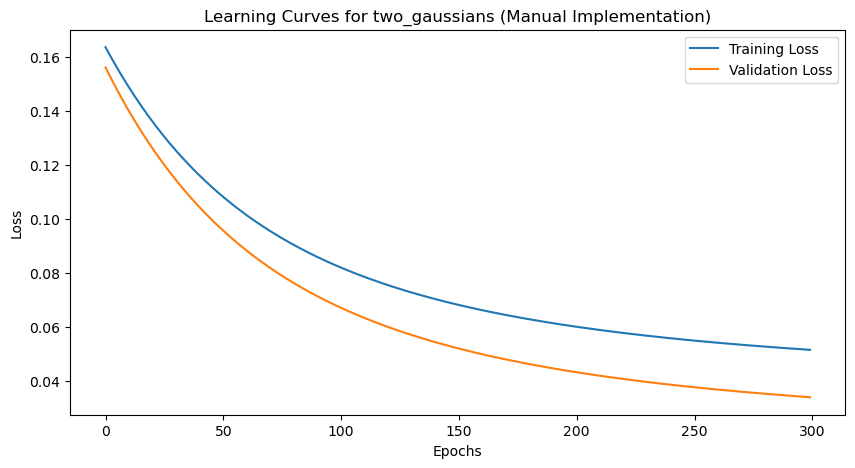

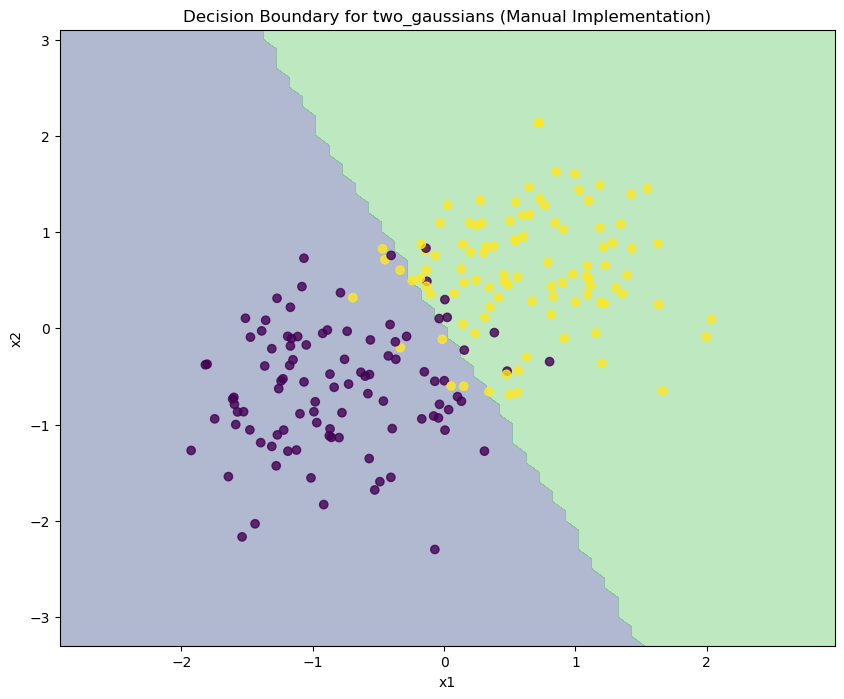


Processing xor dataset
Epoch 0: Train Loss: 0.2804, Val Loss: 0.2969
Epoch 10: Train Loss: 0.2782, Val Loss: 0.2951
Epoch 20: Train Loss: 0.2762, Val Loss: 0.2934
Epoch 30: Train Loss: 0.2744, Val Loss: 0.2918
Epoch 40: Train Loss: 0.2726, Val Loss: 0.2903
Epoch 50: Train Loss: 0.2710, Val Loss: 0.2888
Epoch 60: Train Loss: 0.2694, Val Loss: 0.2875
Epoch 70: Train Loss: 0.2680, Val Loss: 0.2861
Epoch 80: Train Loss: 0.2666, Val Loss: 0.2849
Epoch 90: Train Loss: 0.2653, Val Loss: 0.2837
Epoch 100: Train Loss: 0.2641, Val Loss: 0.2825
Epoch 110: Train Loss: 0.2630, Val Loss: 0.2814
Epoch 120: Train Loss: 0.2619, Val Loss: 0.2803
Epoch 130: Train Loss: 0.2608, Val Loss: 0.2793
Epoch 140: Train Loss: 0.2598, Val Loss: 0.2783
Epoch 150: Train Loss: 0.2589, Val Loss: 0.2774
Epoch 160: Train Loss: 0.2580, Val Loss: 0.2764
Epoch 170: Train Loss: 0.2571, Val Loss: 0.2755
Epoch 180: Train Loss: 0.2563, Val Loss: 0.2747
Epoch 190: Train Loss: 0.2555, Val Loss: 0.2738
Epoch 200: Train Loss: 0.25

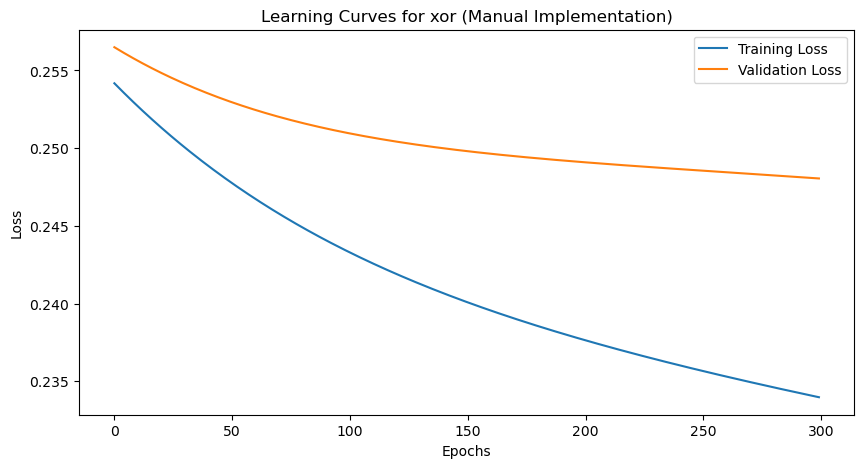

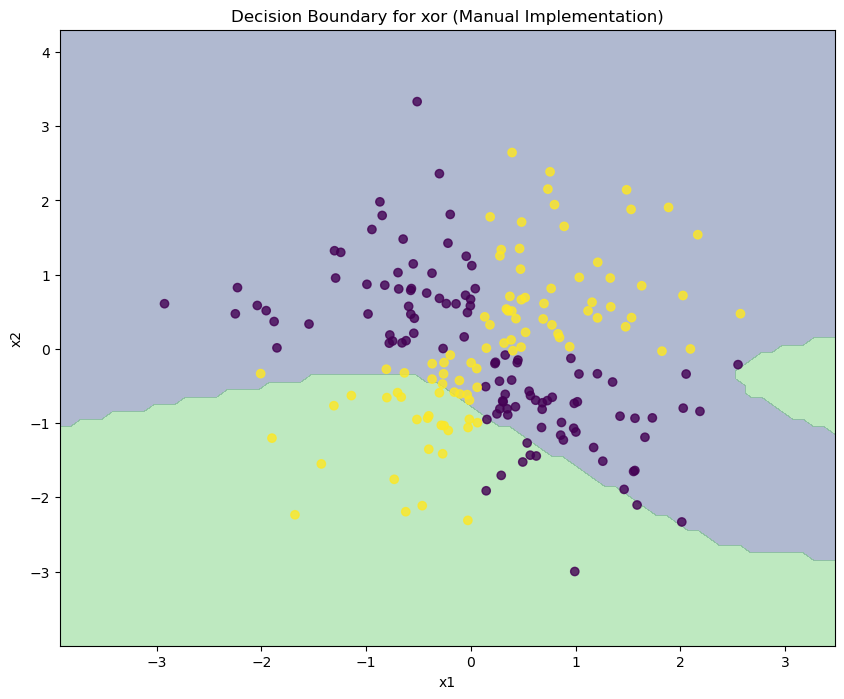

In [15]:
# Main execution
datasets = load_and_preprocess_datasets()
hidden_nodes = [2, 3, 5, 7, 9]
input_dim = 2
output_dim = 1
learning_rate = 0.01

for dataset_name, data in datasets.items():
    print(f"\nProcessing {dataset_name} dataset")
    
    X_train, y_train = data['train']
    X_val, y_val = data['valid']
    X_test, y_test = data['test']
    
    best_model = None
    best_accuracy = 0
    best_k = 0
    
    for k in hidden_nodes:
        model = ManualNeuralNetwork(input_dim=input_dim, hidden_dim=k, output_dim=output_dim)
        
        train_losses, val_losses = train_manual_model(model, X_train, y_train, X_val, y_val, learning_rate)
        
        accuracy = evaluate_manual_model(model, X_test, y_test)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_k = k
    
    print(f"Best number of hidden nodes: {best_k}")
    print(f"Best test accuracy: {best_accuracy:.4f}")
    
    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Learning Curves for {dataset_name} (Manual Implementation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Plot decision boundary
    plot_decision_boundary(best_model, X_test, y_test, f"Decision Boundary for {dataset_name} (Manual Implementation)")

# Question 4: Using step 1

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [36]:
def load_and_preprocess_datasets():
    datasets = {}
    dataset_names = ['spiral']
    
    for name in dataset_names:
        train_data = pd.read_csv(f'{name}_train.csv')
        val_data = pd.read_csv(f'{name}_valid.csv')
        test_data = pd.read_csv(f'{name}_test.csv')
        
        X_train = train_data[['x1', 'x2']].values
        y_train = train_data['label'].values
        X_val = val_data[['x1', 'x2']].values
        y_val = val_data['label'].values
        X_test = test_data[['x1', 'x2']].values
        y_test = test_data['label'].values
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        # Convert to PyTorch tensors
        X_train = torch.FloatTensor(X_train)
        y_train = torch.LongTensor(y_train)
        X_val = torch.FloatTensor(X_val)
        y_val = torch.LongTensor(y_val)
        X_test = torch.FloatTensor(X_test)
        y_test = torch.LongTensor(y_test)
        
        datasets[name] = {
            'train': (X_train, y_train),
            'valid': (X_val, y_val),
            'test': (X_test, y_test)
        }
    
    return datasets

In [37]:
class RegularizedFFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RegularizedFFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.Tanh()
        self.layer2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        self.z1 = self.layer1(x)
        self.a1 = self.activation(self.z1)
        self.z2 = self.layer2(self.a1)
        return self.z2
    
    def input_weight_norm(self):
        return torch.norm(self.layer1.weight, p=2)
    
    def orthogonality(self):
        w = self.layer1.weight
        return torch.norm(torch.mm(w, w.t()) - torch.eye(w.size(0)), p=2)

In [38]:
def train_model(model, train_data, val_data, criterion, optimizer, num_epochs=300, lambda1=0.01, lambda2=0.01):
    X_train, y_train = train_data
    X_val, y_val = val_data
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Add regularization terms
        loss += lambda1 * model.input_weight_norm()
        loss += lambda2 * model.orthogonality()
        
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    
    return train_losses, val_losses

In [39]:
def evaluate_model(model, test_data):
    X_test, y_test = test_data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).float().mean().item()
    return accuracy

In [40]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    model.eval()
    with torch.no_grad():
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = torch.argmax(Z, dim=1).reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [41]:
def plot_intermediate_boundaries(model, X, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    model.eval()
    with torch.no_grad():
        Z = model.activation(model.layer1(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])))
    
    plt.figure(figsize=(15, 5))
    for i in range(Z.shape[1]):
        plt.subplot(1, 3, i+1)
        plt.contourf(xx, yy, Z[:, i].reshape(xx.shape), alpha=0.4)
        plt.title(f"Hidden Node {i+1}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()



Processing spiral dataset
Epoch 0: Train Loss: 0.7554, Val Loss: 0.7317
Epoch 10: Train Loss: 0.7154, Val Loss: 0.6989
Epoch 20: Train Loss: 0.6873, Val Loss: 0.6729
Epoch 30: Train Loss: 0.6500, Val Loss: 0.6366
Epoch 40: Train Loss: 0.5979, Val Loss: 0.5881
Epoch 50: Train Loss: 0.5435, Val Loss: 0.5396
Epoch 60: Train Loss: 0.5059, Val Loss: 0.5091
Epoch 70: Train Loss: 0.4933, Val Loss: 0.5022
Epoch 80: Train Loss: 0.4925, Val Loss: 0.5040
Epoch 90: Train Loss: 0.4919, Val Loss: 0.5037
Epoch 100: Train Loss: 0.4903, Val Loss: 0.5013
Epoch 110: Train Loss: 0.4891, Val Loss: 0.4991
Epoch 120: Train Loss: 0.4882, Val Loss: 0.4977
Epoch 130: Train Loss: 0.4873, Val Loss: 0.4968
Epoch 140: Train Loss: 0.4864, Val Loss: 0.4959
Epoch 150: Train Loss: 0.4855, Val Loss: 0.4951
Epoch 160: Train Loss: 0.4848, Val Loss: 0.4943
Epoch 170: Train Loss: 0.4841, Val Loss: 0.4936
Epoch 180: Train Loss: 0.4835, Val Loss: 0.4931
Epoch 190: Train Loss: 0.4829, Val Loss: 0.4926
Epoch 200: Train Loss: 0

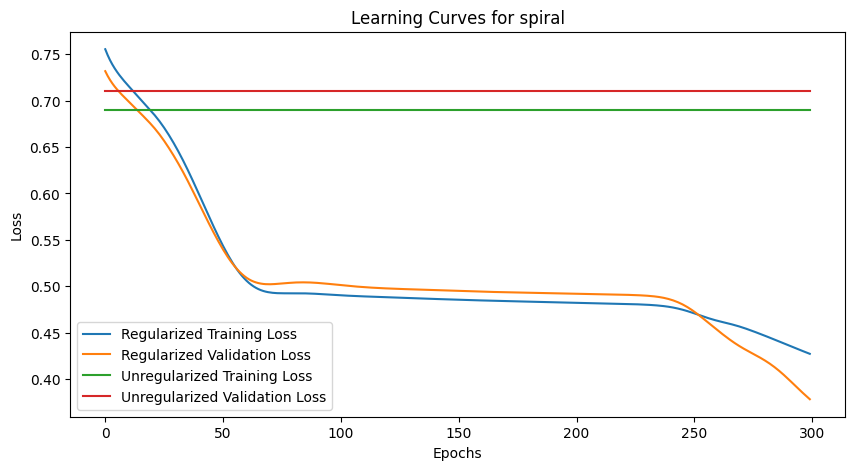

/var/folders/60/m4vjsxs154b8jqhld_x5c2j80000gn/T/ipykernel_19790/1698918276.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
/var/folders/60/m4vjsxs154b8jqhld_x5c2j80000gn/T/ipykernel_19790/1698918276.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, 0.1))


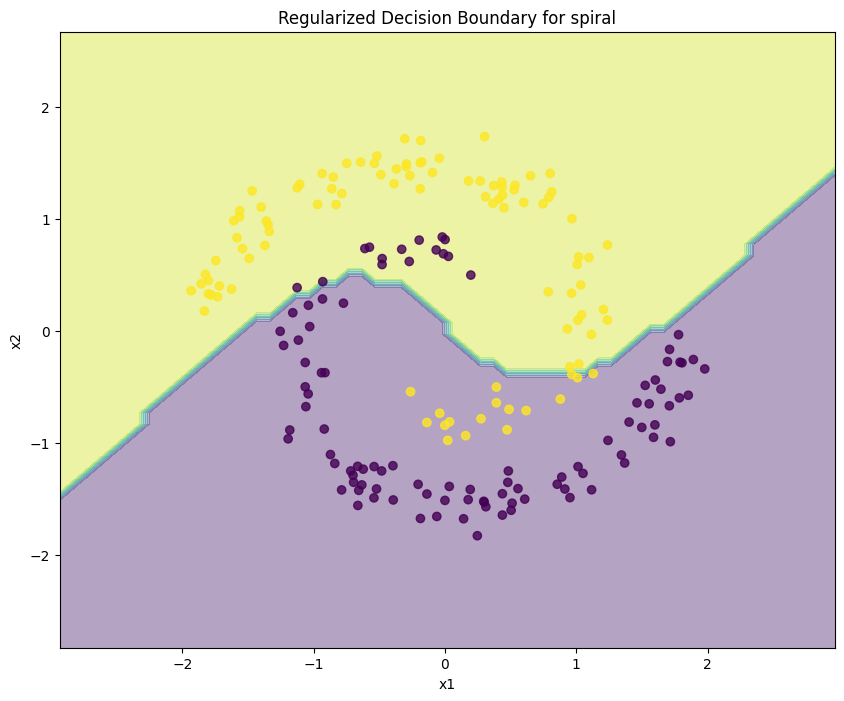

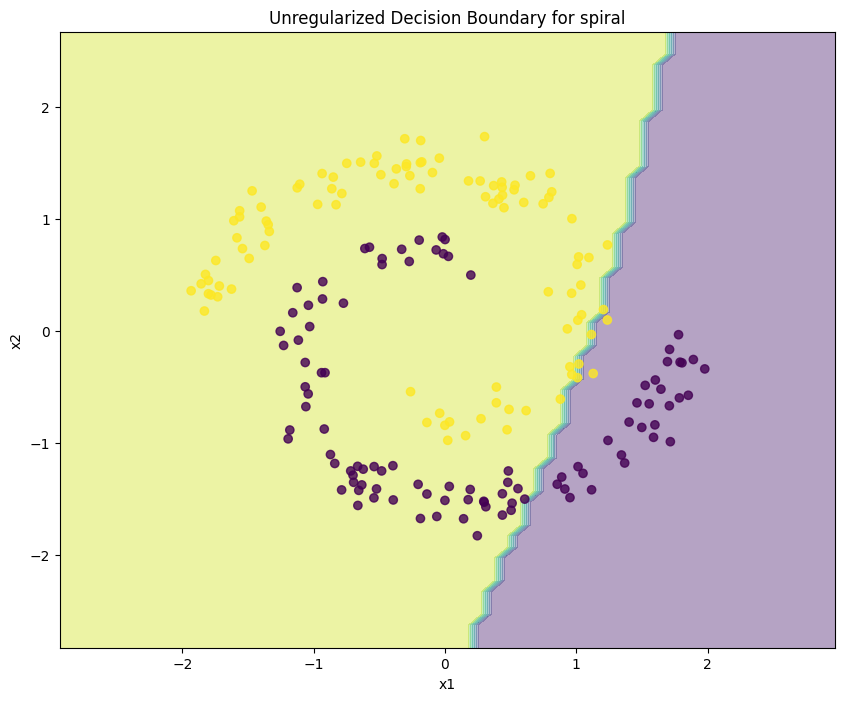

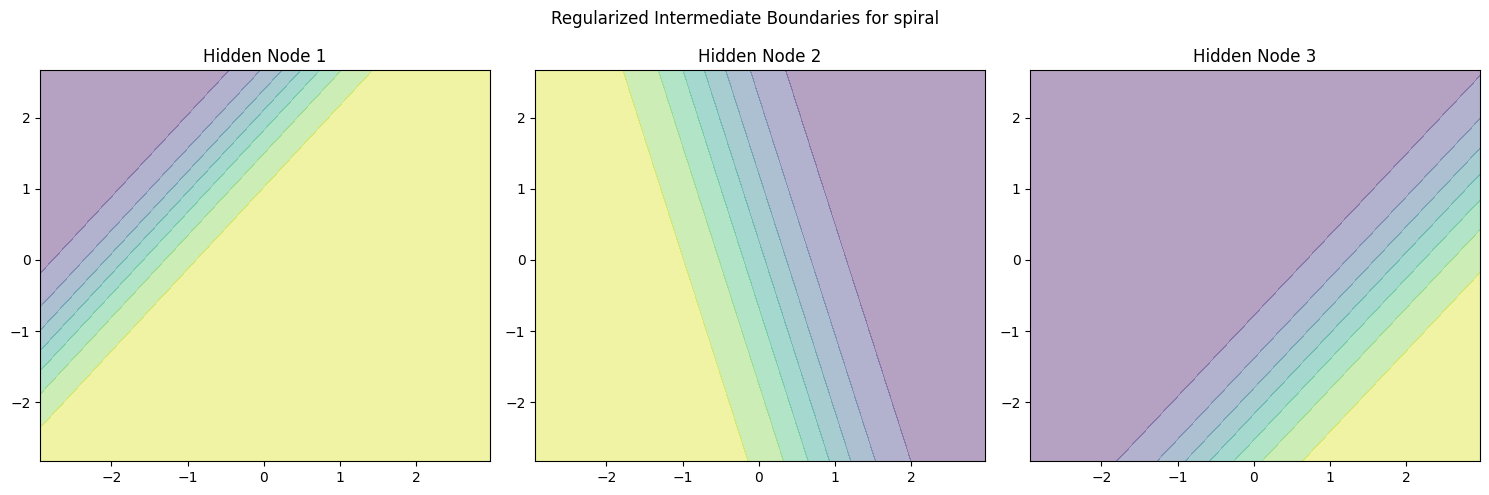

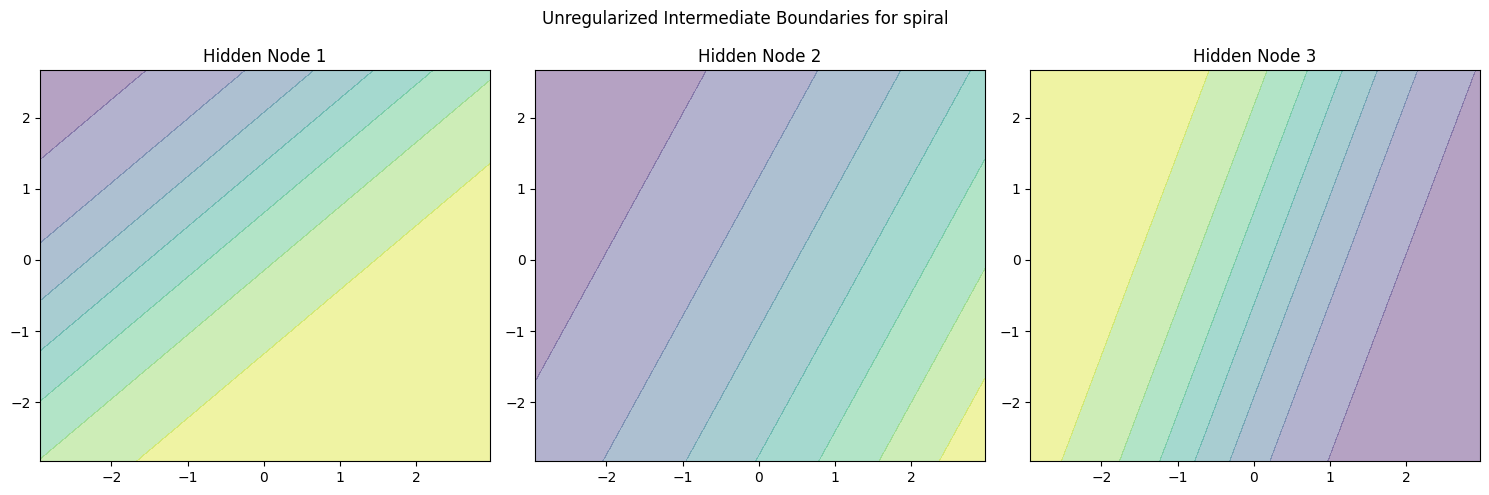

In [42]:
# Main execution
datasets = load_and_preprocess_datasets()
input_dim = 2
hidden_dim = 3
output_dim = 2
learning_rate = 0.01
lambda1 = 0.01  # Weight for input layer norm regularization
lambda2 = 0.01  # Weight for orthogonality regularization

for dataset_name, data in datasets.items():
    print(f"\nProcessing {dataset_name} dataset")
    
    train_data = data['train']
    val_data = data['valid']
    test_data = data['test']
    
    # Train regularized model
    reg_model = RegularizedFFNN(input_dim, hidden_dim, output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(reg_model.parameters(), lr=learning_rate)
    
    reg_train_losses, reg_val_losses = train_model(reg_model, train_data, val_data, criterion, optimizer, lambda1=lambda1, lambda2=lambda2)
    
    # Train unregularized model
    unreg_model = RegularizedFFNN(input_dim, hidden_dim, output_dim)
    unreg_train_losses, unreg_val_losses = train_model(unreg_model, train_data, val_data, criterion, optimizer, lambda1=0, lambda2=0)
    
    # Evaluate models
    reg_accuracy = evaluate_model(reg_model, test_data)
    unreg_accuracy = evaluate_model(unreg_model, test_data)
    
    print(f"Regularized Model Test Accuracy: {reg_accuracy:.4f}")
    print(f"Unregularized Model Test Accuracy: {unreg_accuracy:.4f}")
    
    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(reg_train_losses, label='Regularized Training Loss')
    plt.plot(reg_val_losses, label='Regularized Validation Loss')
    plt.plot(unreg_train_losses, label='Unregularized Training Loss')
    plt.plot(unreg_val_losses, label='Unregularized Validation Loss')
    plt.title(f"Learning Curves for {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Plot decision boundaries
    X_test, y_test = test_data
    plot_decision_boundary(reg_model, X_test, y_test, f"Regularized Decision Boundary for {dataset_name}")
    plot_decision_boundary(unreg_model, X_test, y_test, f"Unregularized Decision Boundary for {dataset_name}")
    
    # Plot intermediate decision boundaries
    plot_intermediate_boundaries(reg_model, X_test, f"Regularized Intermediate Boundaries for {dataset_name}")
    plot_intermediate_boundaries(unreg_model, X_test, f"Unregularized Intermediate Boundaries for {dataset_name}")